In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Data Preparation 

Import all the neccessary libraries 

In [2]:
import pandas as pd #data processing
import numpy as np #linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

#### Loading in the Data

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Data Exploration

 Inspecting the data and understanding what kind of information is stored in the DataFrame.

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Check to understand the size of the DataFrame, identifying missing values, and checking data types.

In [5]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

Access the names of all the columns in the DataFrame

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Check for missing values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Check for the number of unique values for each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Check for the descriptive statistics for numerical columns in the DataFrame

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Count the occurrences of each unique value in the 'race/ethnicity' column 

In [10]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [11]:
#numbers of gender in each (race/ethnicity)
df.groupby('race/ethnicity')['gender'].value_counts()

race/ethnicity  gender
group A         male       53
                female     36
group B         female    104
                male       86
group C         female    180
                male      139
group D         male      133
                female    129
group E         male       71
                female     69
Name: count, dtype: int64

In [12]:
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [13]:
df[df['math score'] == 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


Condition to know who scored 0 in Mathematics

In [14]:
df[df['math score'] == 0]
#df[df['math score'] == 0 ].value_counts()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


Top 10 Most Common Math Scores

In [15]:
df['math score'].value_counts().head(10)

math score
65    36
62    35
69    32
59    32
61    27
73    27
63    26
67    26
68    26
71    26
Name: count, dtype: int64

Condition to determine the number of female that scored below average in math

In [16]:
df[df['math score'] < 50 ][df['gender'] == 'female']['math score'].count() 

86

Condition to determine the number of male that scored below average in math

In [17]:
df[df['math score'] < 50 ][df['gender'] == 'male']['math score'].count() 

49

In [18]:
#df[df['math score'] < 50 ][df['race/ethnicity'] == 'group A']


Distribution of Math Scores by Gender

In [19]:
df.groupby('gender')['math score'].value_counts()

gender  math score
female  65            28
        59            21
        77            16
        69            16
        67            16
                      ..
male    27             1
        28             1
        35             1
        36             1
        37             1
Name: count, Length: 147, dtype: int64

Getting the average score from each group

In [20]:

df['average score']=(df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Grade Classification Based on Average Scores

In [21]:
def grade_values(average_score):
    if(average_score >= 90):
        return 'A+'
    if(average_score >= 85):
        return 'A'
    if(average_score >= 80):
        return 'B+'
    if(average_score >= 70):
        return 'B'
    if(average_score >= 60):
        return 'C+'
    if(average_score >= 55):
        return 'C'
    if(average_score >= 50):
        return 'C-'
    if(average_score >= 45):
        return 'D'
    if(average_score >= 40):
        return 'E'
    else:
        return "F"
    
df['grade values'] = df.apply(lambda x:grade_values(x['average score']),axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,grade values
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,B+
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D
4,male,group C,some college,standard,none,76,78,75,76.333333,B


Course Outcome Based on Grade Values

In [22]:
def course_outcome(grade_values):
    if(grade_values == 'A+' or grade_values =='A' or grade_values =='B+' or grade_values == 'B' or 
       grade_values == 'C+' or grade_values == 'C' or grade_values == 'D'):
        return 'Pass'
    if(grade_values == 'E'):
        return 'one lifeline'
    else:
        return 'Fail'
    
df["course outcome"]=df.apply(lambda x:course_outcome(x["grade values"]),axis=1)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,grade values,course outcome
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,B+,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A+,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D,Pass
4,male,group C,some college,standard,none,76,78,75,76.333333,B,Pass
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B,Pass
6,female,group B,some college,standard,completed,88,95,92,91.666667,A+,Pass
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,E,one lifeline
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C+,Pass
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,D,Pass


Correlation Matrix of Numeric Data

In [23]:
numeric_data = df.select_dtypes(include = 'number')
correlation_matrix = numeric_data.corr()
correlation_matrix

,math score,reading score,writing score,average score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average score,0.918746,0.970331,0.965667,1.000000


Test Preparation Course Completion to check how the student prepared

In [24]:
my_list= []
for i in df['test preparation course']:
    if i == 'completed' :
        my_list.append(True)
        
    else:
        my_list.append(False)
df['test prep outcome'] = my_list
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,grade values,course outcome,test prep outcome
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B,Pass,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,B+,Pass,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A+,Pass,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D,Pass,False
4,male,group C,some college,standard,none,76,78,75,76.333333,B,Pass,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,A+,Pass,True
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,C,Pass,False
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,C+,Pass,True
998,female,group D,some college,standard,completed,68,78,77,74.333333,B,Pass,True


Renaming the column because it is too long

In [25]:
df.rename(columns = {'parental level of education': 'parent education'}, inplace=True)
df.rename(columns = {'test preparation course': 'test prep course'}, inplace=True)

Rating the level of education of the parents 

In [26]:
parent_edu_rating = {'some high school':0, 'high school':1, 'some college':2, "associate's degree": 3, 
                                "bachelor's degree": 4, "master's degree": 5}
df.loc[:,'parent education']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parent education, Length: 1000, dtype: object

Giving a counts of the level of education of the parents 



In [27]:
education_counts = df['parent education'].value_counts()
education_counts

parent education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Groupping of parent level of education rating 

In [28]:
df['parent education'] = df['parent education'].map(parent_edu_rating)
df.head()

,gender,race/ethnicity,parent education,lunch,test prep course,math score,reading score,writing score,average score,grade values,course outcome,test prep outcome
0,female,group B,4,standard,none,72,72,74,72.666667,B,Pass,False
1,female,group C,2,standard,completed,69,90,88,82.333333,B+,Pass,True
2,female,group B,5,standard,none,90,95,93,92.666667,A+,Pass,False
3,male,group A,3,free/reduced,none,47,57,44,49.333333,D,Pass,False
4,male,group C,2,standard,none,76,78,75,76.333333,B,Pass,False


Convert Test Preparation Course to Numeric Values for Future Statistical Analysis

In [29]:
test_prep_to_number = {'none':0, 'completed':1}
df['test prep course'] = df['test prep course'].map(test_prep_to_number)
df.head()

,gender,race/ethnicity,parent education,lunch,test prep course,math score,reading score,writing score,average score,grade values,course outcome,test prep outcome
0,female,group B,4,standard,0,72,72,74,72.666667,B,Pass,False
1,female,group C,2,standard,1,69,90,88,82.333333,B+,Pass,True
2,female,group B,5,standard,0,90,95,93,92.666667,A+,Pass,False
3,male,group A,3,free/reduced,0,47,57,44,49.333333,D,Pass,False
4,male,group C,2,standard,0,76,78,75,76.333333,B,Pass,False


Lunch Distribution

In [30]:
lunch_counts = df['lunch'].value_counts()
lunch_counts

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Converting lunch to numbers, completed would be 1 while free/reduced would be 0

In [31]:
lunch_to_number = {'free/reduced':0, 'standard':1}
df['lunch'] = df['lunch'].map(lunch_to_number)
df.head()

,gender,race/ethnicity,parent education,lunch,test prep course,math score,reading score,writing score,average score,grade values,course outcome,test prep outcome
0,female,group B,4,1,0,72,72,74,72.666667,B,Pass,False
1,female,group C,2,1,1,69,90,88,82.333333,B+,Pass,True
2,female,group B,5,1,0,90,95,93,92.666667,A+,Pass,False
3,male,group A,3,0,0,47,57,44,49.333333,D,Pass,False
4,male,group C,2,1,0,76,78,75,76.333333,B,Pass,False


Total score of all the 3 courses

In [32]:
df['total score']= df['math score']+ df['reading score']+ df['writing score']
df['total score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total score, Length: 1000, dtype: int64

Taking a Final look at the Table

In [33]:
df.head()

,gender,race/ethnicity,parent education,lunch,test prep course,math score,reading score,writing score,average score,grade values,course outcome,test prep outcome,total score
0,female,group B,4,1,0,72,72,74,72.666667,B,Pass,False,218
1,female,group C,2,1,1,69,90,88,82.333333,B+,Pass,True,247
2,female,group B,5,1,0,90,95,93,92.666667,A+,Pass,False,278
3,male,group A,3,0,0,47,57,44,49.333333,D,Pass,False,148
4,male,group C,2,1,0,76,78,75,76.333333,B,Pass,False,229


### Data Visualization

Comparison of Test Scores Distribution

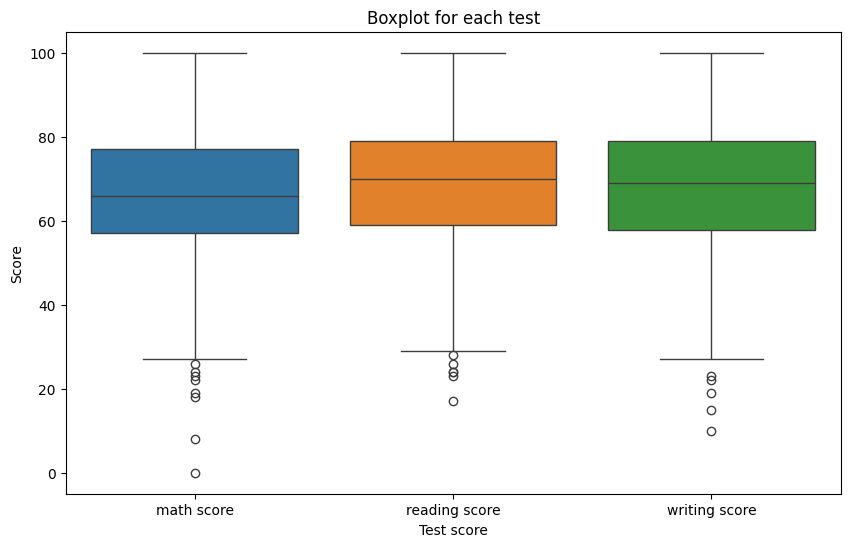

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(data = [df['math score'], df['reading score'], df['writing score']])
plt.xticks([0, 1, 2], ['math score', 'reading score', 'writing score'])
plt.xlabel('Test score')
plt.ylabel('Score')
plt.title('Boxplot for each test')

plt.show()

This shows that Math is the most inconsistent and is slightly worse than writing.
While Reading has the best scores on average, being the most consistent as well.

Distribution of Total Scores

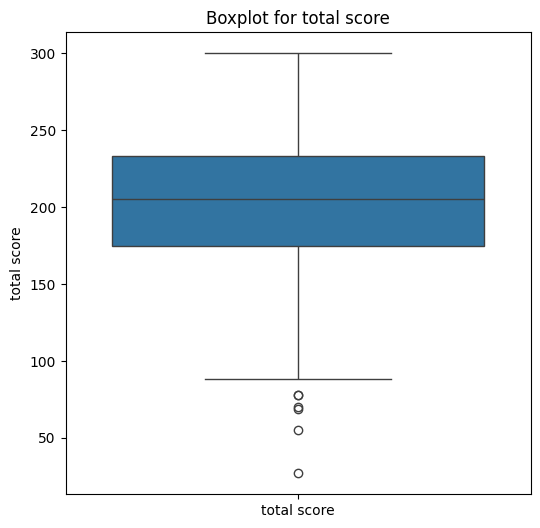

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(data = df['total score'])
plt.xticks([0], ['total score'])
plt.title('Boxplot for total score')
plt.show()

Impact of lunch and test preparation on Students'performance.
Pie plots are useful showing distributions, so we will use them to represent lunch and course values.

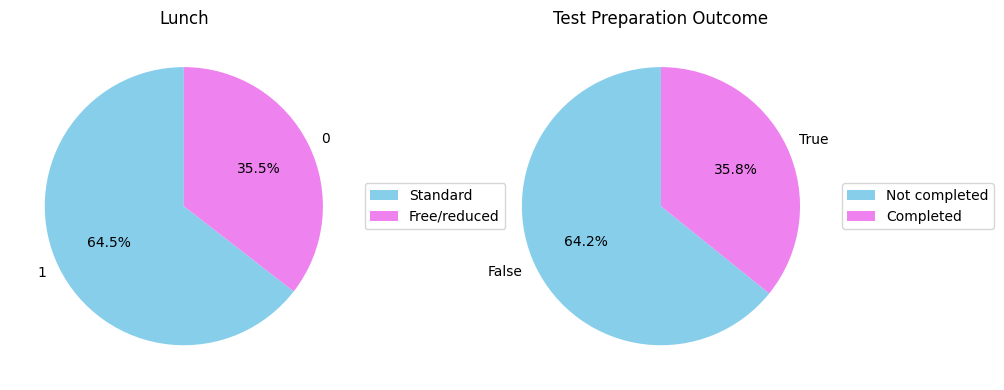

In [36]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
lunch_counts = df['lunch'].value_counts(normalize=True)
labels_lunch = lunch_counts.index 
plt.pie(lunch_counts, labels=labels_lunch, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'violet'])
plt.title('Lunch')
plt.legend(['Standard', 'Free/reduced'],loc='center left', bbox_to_anchor=(1,0.5))

plt.subplot(1, 2, 2)
course_counts = df['test prep outcome'].value_counts(normalize=True)
labels_course = course_counts.index 
plt.pie(course_counts, labels=labels_course, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'violet'])
plt.legend(['Not completed', 'Completed'], loc = 'center left',bbox_to_anchor=(1,0.5))
plt.title('Test Preparation Outcome')

plt.tight_layout()
plt.show()


With these graphs, observations are:

* Most students take standard lunch before the test.
* Most students do not complete the course.

What happens when we examine the overlap between these two sets of values? 
Given the striking similarity in the numbers across both graphs, could it be that students opting for standard lunch aren't completing the full course? Let's generate one more pie chart to answer this.

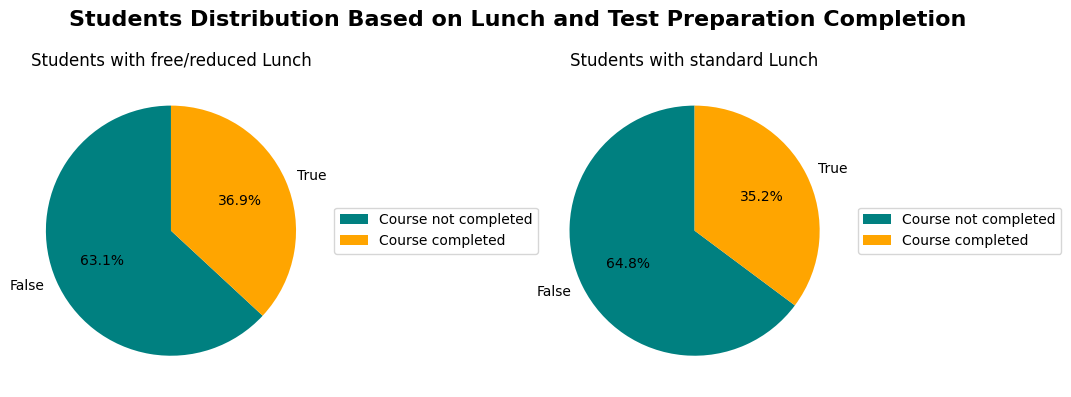

In [58]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
lunch_and_course_counts = df.groupby('lunch')['test prep outcome'].value_counts()
labels_lunch_and_course_counts = lunch_and_course_counts.index
plt.pie(lunch_and_course_counts[0], labels=lunch_and_course_counts[0].index, autopct='%1.1f%%', startangle=90,
        colors=['teal', 'orange'])
plt.title('Students with free/reduced Lunch')
plt.legend(['Course not completed', 'Course completed'], loc = 'center left',bbox_to_anchor=(1,0.5))

plt.subplot(1, 2, 2)

plt.pie(lunch_and_course_counts[1], labels=lunch_and_course_counts[1].index, autopct='%1.1f%%', startangle=90, 
        colors=['teal', 'orange'])
plt.title('Students with standard Lunch')
plt.suptitle('Students Distribution Based on Lunch and Test Preparation Completion', fontsize=16, fontweight='bold')
plt.legend(['Course not completed', 'Course completed'], loc = 'center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
plt.show()

No, there is no relationship on these groups, as there is no difference on the percentages.

Assigning Levels Based on Total Score Quintiles

In [38]:
percentiles = df['total score'].describe(percentiles = np.arange(0,1,0.2))
quintiles = percentiles[['0%', '20%', '40%', '60%', '80%','max']]
labels = [1, 2, 3, 4, 5]
df['level'] = pd.cut(df['total score'], bins=quintiles, labels=labels, include_lowest=True)
df['level'] = df['level'].astype(int)
df.head()

,gender,race/ethnicity,parent education,lunch,test prep course,math score,reading score,writing score,average score,grade values,course outcome,test prep outcome,total score,level
0,female,group B,4,1,0,72,72,74,72.666667,B,Pass,False,218,4
1,female,group C,2,1,1,69,90,88,82.333333,B+,Pass,True,247,5
2,female,group B,5,1,0,90,95,93,92.666667,A+,Pass,False,278,5
3,male,group A,3,0,0,47,57,44,49.333333,D,Pass,False,148,1
4,male,group C,2,1,0,76,78,75,76.333333,B,Pass,False,229,4


Mean Values of Parent Education, Lunch, and Test Preparation Course by Total Score Levels

- Using the mean average to find out the relationship between parent level of education, lunch taken and test preparation

In [39]:
level_df = df.groupby('level')[['parent education', 'lunch', 'test prep course']].mean()
level_df
#print(df.columns)

,parent education,lunch,test prep course
level,,,
1,1.717073,0.429268,0.200000
2,2.029557,0.566502,0.246305
3,2.055556,0.696970,0.383838
4,2.147959,0.739796,0.428571
5,2.469697,0.803030,0.540404


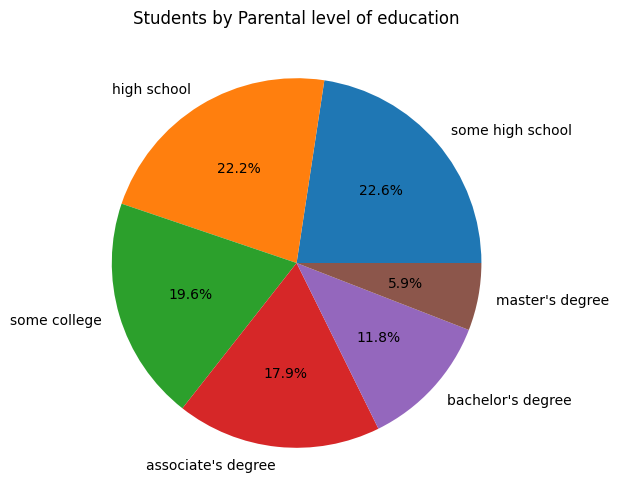

In [57]:
labels = df['parent education'].value_counts().index

plt.figure(figsize=(10, 6))
plt.pie(df['parent education'].value_counts(), autopct='%1.1f%%', labels = parent_edu_rating)
plt.title('Students by Parental level of education')



plt.show()

Mean Values of Parental Education, Lunch, and Test Preparation Outcome by Student Level

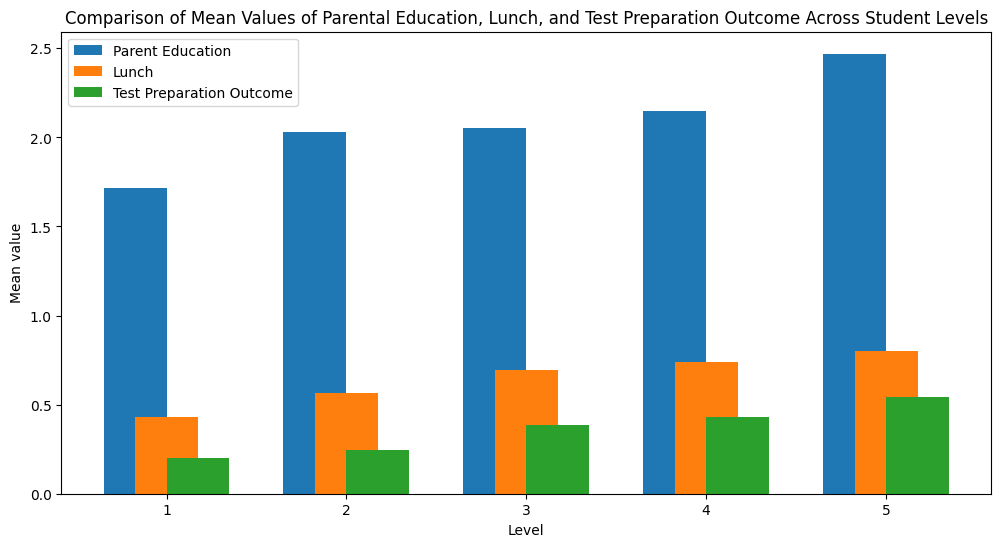

In [41]:
width = 0.35
fig, ax = plt.subplots(figsize = (12,6))
ade1 = ax.bar(level_df.index - width/2, level_df['parent education'], width, label = 'Parent Education')
ade2 = ax.bar(level_df.index, level_df['lunch'], width, label = 'Lunch')
ade3 = ax.bar(level_df.index + width/2, level_df['test prep course'], width, label = 'Test Preparation Outcome')
plt.title("Comparison of Mean Values of Parental Education, Lunch, and Test Preparation Outcome Across Student Levels")


ax.set_xlabel('Level')
ax.set_ylabel('Mean value')
ax.set_xticks(level_df.index)
ax.legend()
plt.show()



From a visual perspective, the contrast is evident. As the student's level increases, there is a noticeable 
increase in parental education, lunch quality, and course engagement.

* A heightened level of parental education appears to be a significant influence in determining the student's 
level. Additionally, highlighting the importance of nutrition and active participation in courses can contribute 
to improved outcomes.

#### Student's Demographic
Taking a look at the distribution of gender and race groups

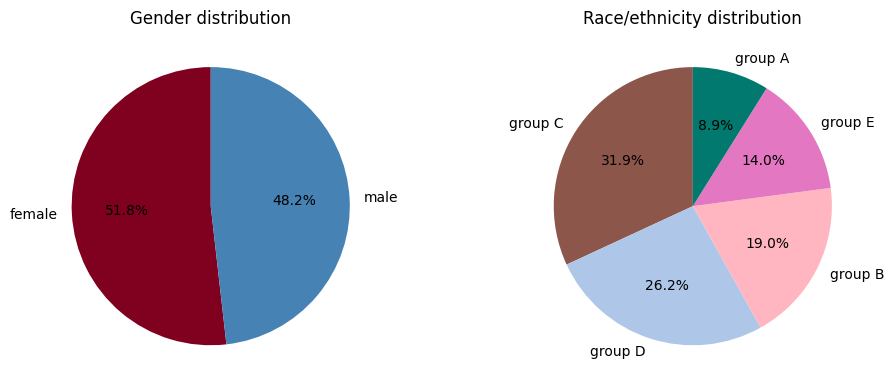

In [63]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
gender_counts = df['gender'].value_counts(normalize=True)
labels_gender = gender_counts.index
plt.pie(gender_counts, labels=labels_gender, autopct='%1.1f%%', startangle=90, colors=['#800020', '#4682b4'])
plt.title('Gender distribution')


plt.subplot(1, 2, 2)
race_counts = df['race/ethnicity'].value_counts(normalize=True)
labels_race = race_counts.index
plt.pie(race_counts, labels=labels_race, autopct='%1.1f%%', startangle=90, colors=['#8c564b', '#aec7e8', 
                    '#ffb6c1', '#e377c2', '#01796f'])


plt.title('Race/ethnicity distribution')

plt.tight_layout()
plt.show()



Fewer more females than males.
* On race/ethnicity, group C and D are the most represented, group B being on average while A and E are less common.

#### Exploring Relationships with Pairplot: Gender Comparison

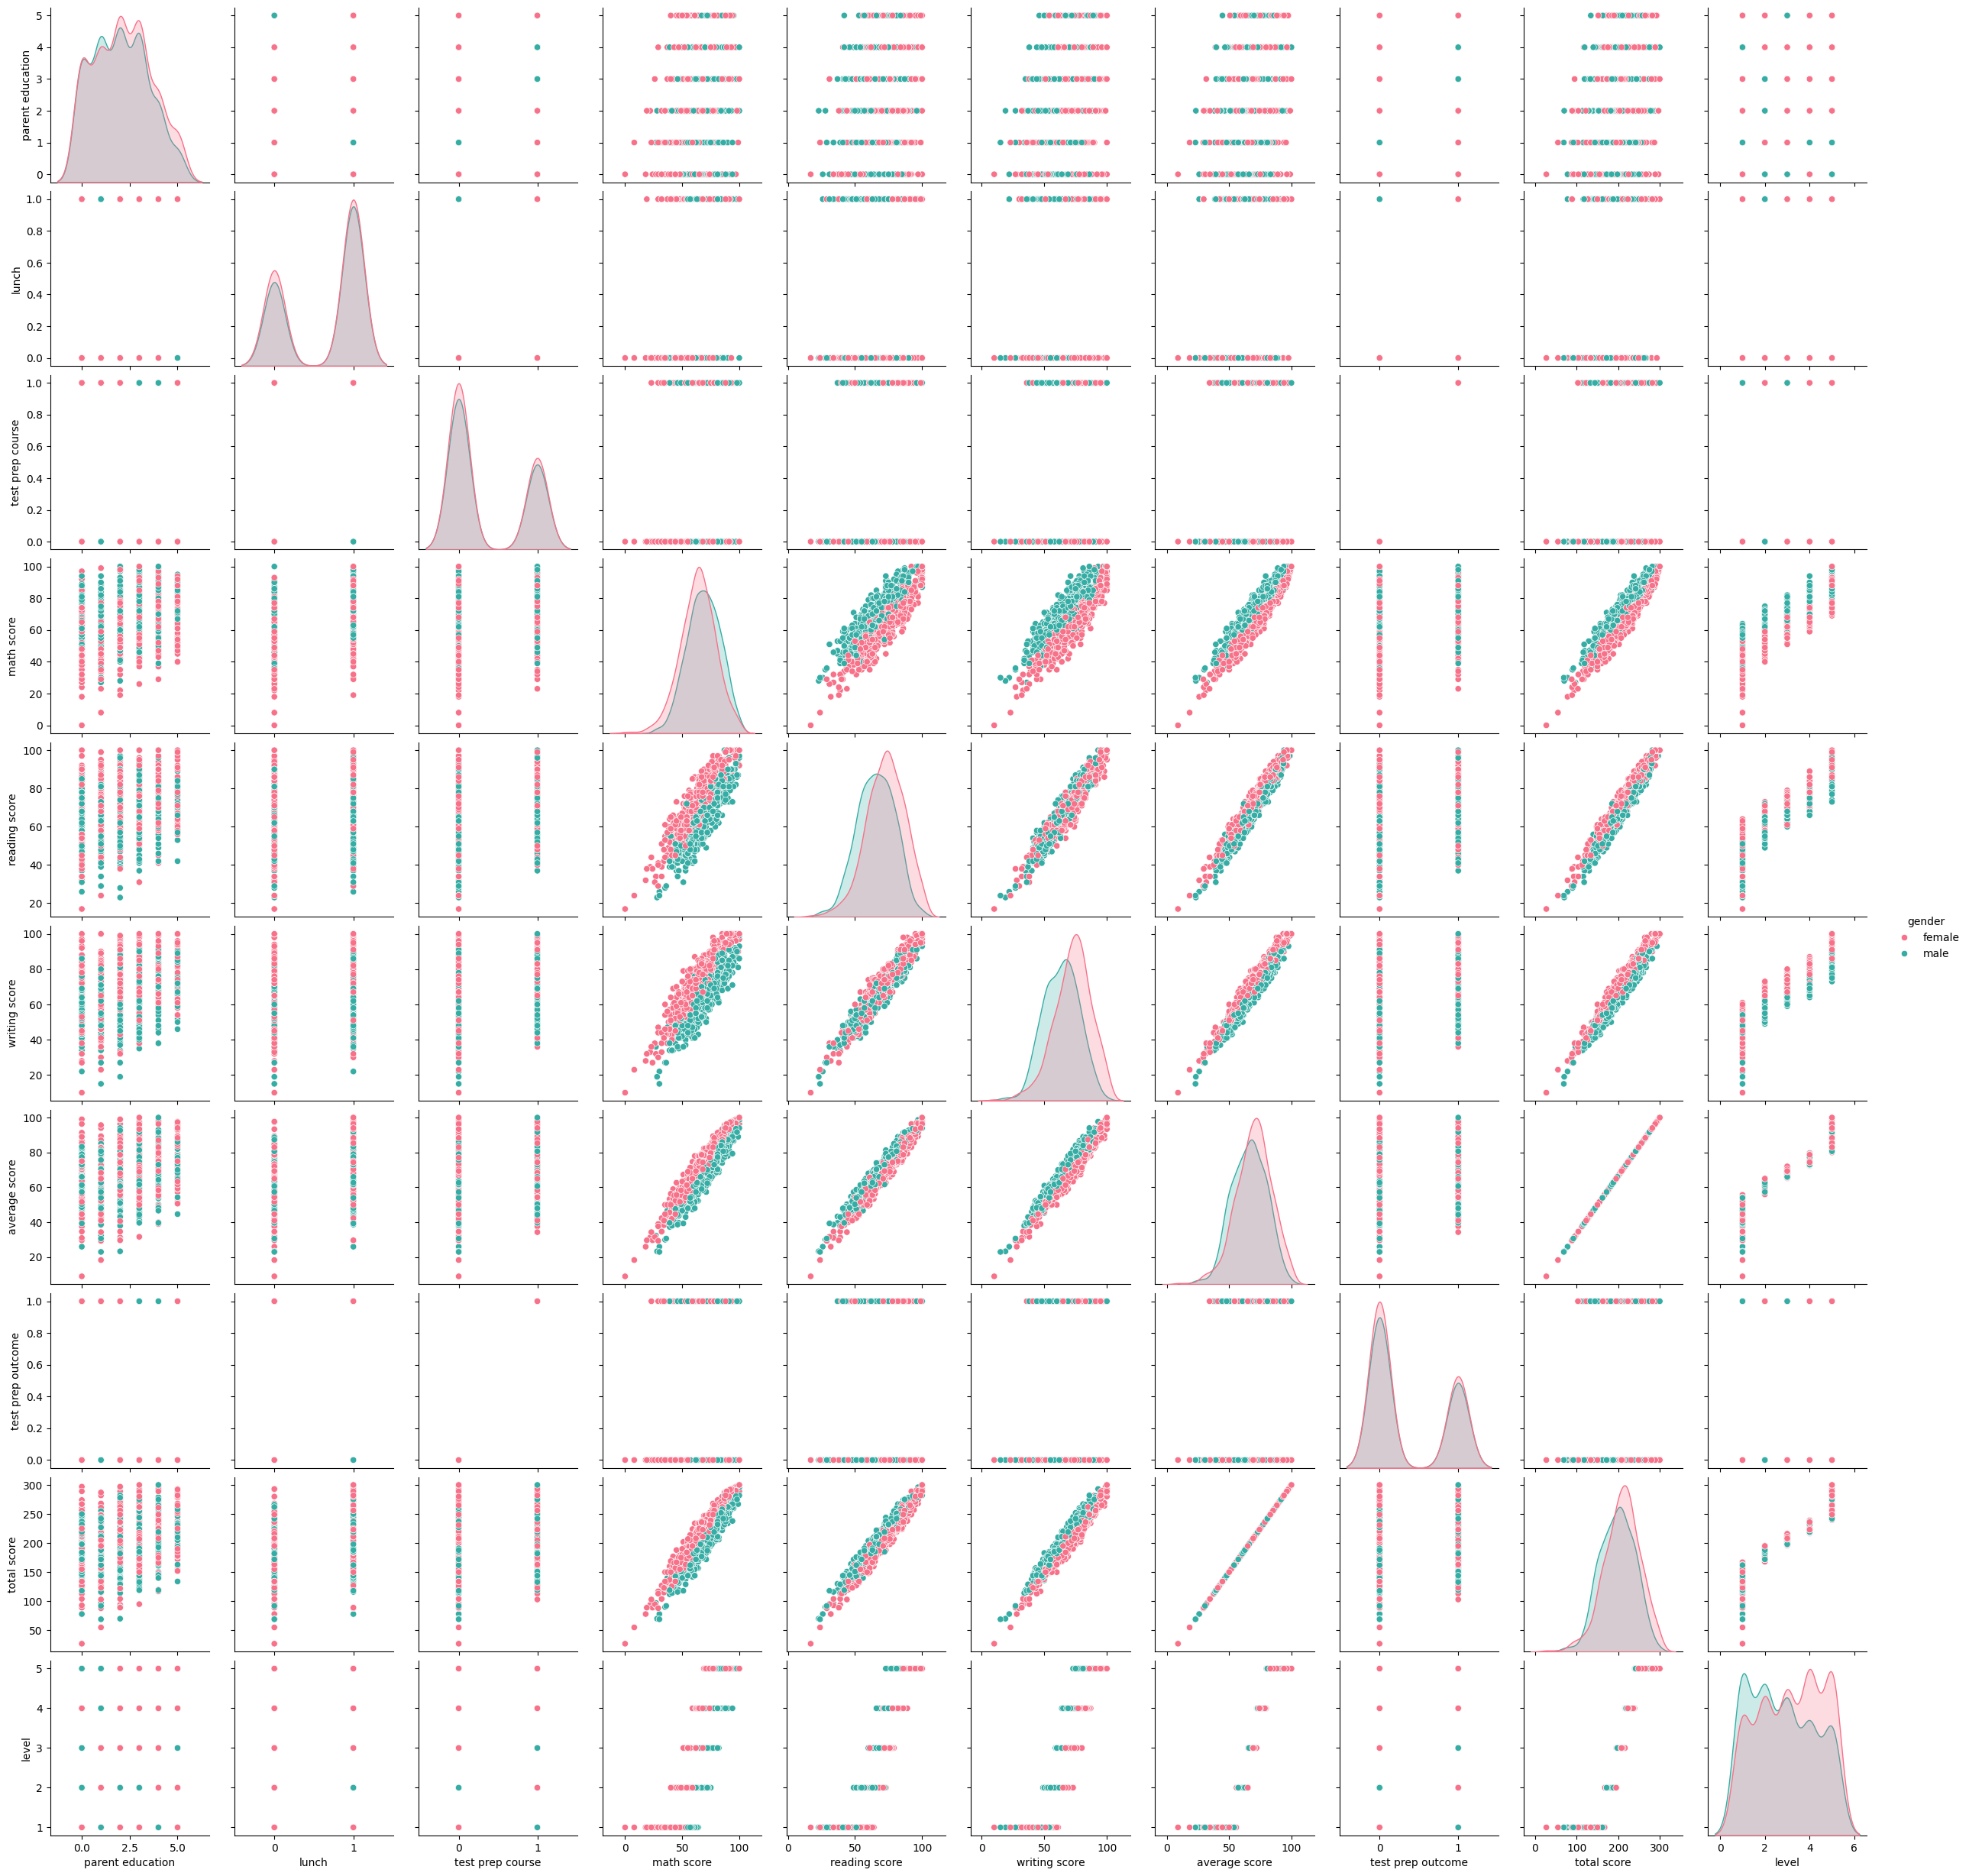

In [62]:
sns.pairplot(df,hue="gender",kind="scatter",palette="husl")

plt.show()

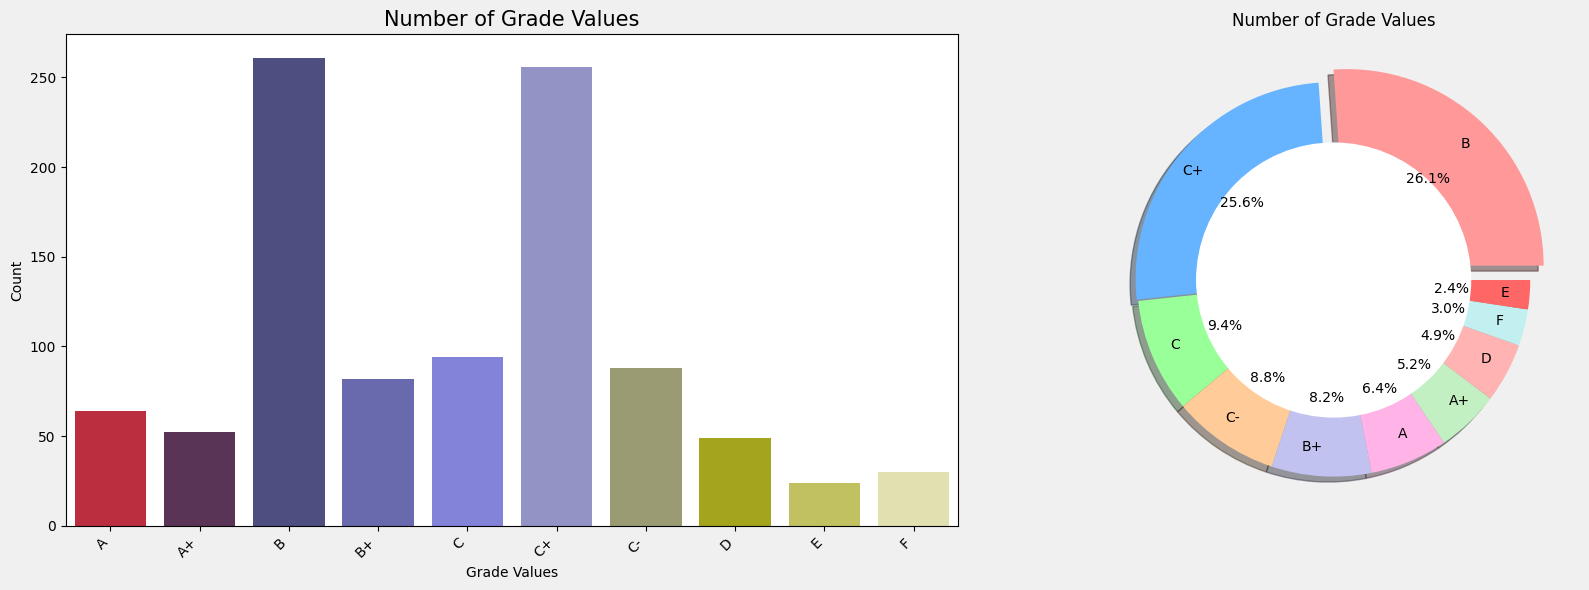

In [44]:
df['grade values'] = df['average score'].apply(grade_values)
grade_counts = df['grade values'].value_counts()
sorted_grades = grade_counts.sort_index()

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=sorted_grades.index, y=sorted_grades.values, palette="gist_stern")
plt.title('Number of Grade Values', fontsize=15)
plt.xlabel("Grade Values")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right') 

sizes = df['grade values'].value_counts().values
labels = df['grade values'].value_counts().index
explode = (0.1, 0.01, 0, 0, 0, 0, 0, 0, 0, 0) 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ffb3b3','#c2f0f0','#ff6666']

plt.subplot(1, 2, 2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 10}, labeldistance=0.85, startangle=0)
plt.title('Number of Grade Values')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.tight_layout()
plt.gcf().set_facecolor('#f0f0f0')

plt.show()


In [45]:
df.head()

,gender,race/ethnicity,parent education,lunch,test prep course,math score,reading score,writing score,average score,grade values,course outcome,test prep outcome,total score,level
0,female,group B,4,1,0,72,72,74,72.666667,B,Pass,False,218,4
1,female,group C,2,1,1,69,90,88,82.333333,B+,Pass,True,247,5
2,female,group B,5,1,0,90,95,93,92.666667,A+,Pass,False,278,5
3,male,group A,3,0,0,47,57,44,49.333333,D,Pass,False,148,1
4,male,group C,2,1,0,76,78,75,76.333333,B,Pass,False,229,4


In [46]:
columns_to_mean = df.select_dtypes(include = 'number').columns
gender_df = pd.DataFrame(columns = columns_to_mean)
gender_df = df.groupby('gender')[columns_to_mean].mean()
gender_df

,parent education,lunch,test prep course,math score,reading score,writing score,average score,total score,level
gender,,,,,,,,,
female,2.142857,0.635135,0.355212,63.633205,72.608108,72.467181,69.569498,208.708494,3.160232
male,2.014523,0.655602,0.360996,68.728216,65.473029,63.311203,65.837483,197.512448,2.784232


In [47]:
race_ethnicity_df = pd.DataFrame(columns=columns_to_mean)
race_ethnicity_df = df.groupby('race/ethnicity')[columns_to_mean].mean()
race_ethnicity_df

,parent education,lunch,test prep course,math score,reading score,writing score,average score,total score,level
race/ethnicity,,,,,,,,,
group A,1.786517,0.595506,0.348315,61.629213,64.674157,62.674157,62.992509,188.977528,2.460674
group B,1.868421,0.636842,0.357895,63.452632,67.352632,65.600000,65.468421,196.405263,2.789474
group C,2.166144,0.642633,0.366771,64.463950,69.103448,67.827586,67.131661,201.394984,2.918495
group D,2.118321,0.637405,0.312977,67.362595,70.030534,70.145038,69.179389,207.538168,3.099237
group E,2.292857,0.707143,0.428571,73.821429,73.028571,71.407143,72.752381,218.257143,3.478571


Reading the difference in parental education

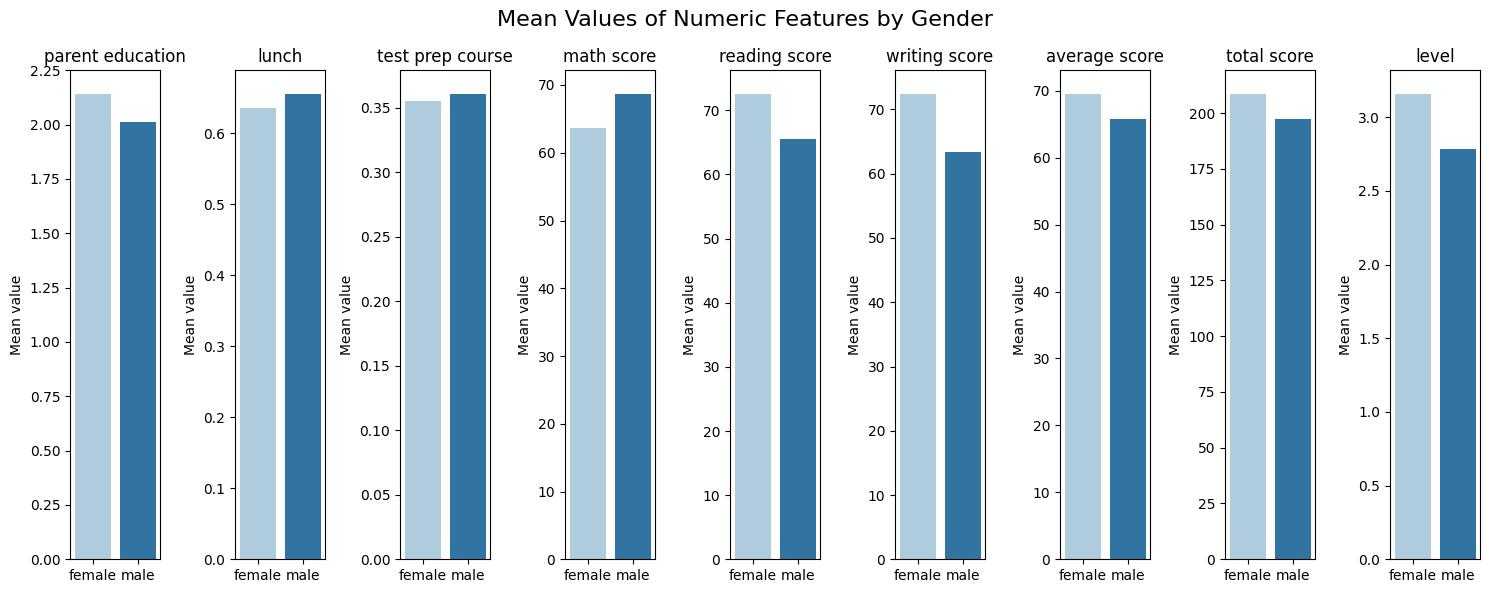

In [60]:
fig, axes = plt.subplots(1, len(gender_df.columns), figsize=(15, 6))

for i, column_name in enumerate(gender_df.columns):
    sns.barplot(x=gender_df.index, y=column_name, data=gender_df, ax=axes[i], palette='Paired')
    axes[i].set_title(column_name)
    axes[i].set_ylabel('Mean value')
    axes[i].set_xlabel('')

fig.suptitle('Mean Values of Numeric Features by Gender', fontsize=16)


plt.tight_layout()
plt.show()


#### The key findings

- Parental Education: Females exhibit higher levels of parental education compared to males. This suggests that 
females may have access to a more supportive educational environment at home, potentially contributing to their 
academic performance.

- No Significant Differences in Lunch: Notably, no substantial differences are observed between genders regarding lunch type. This indicates that factors beyond basic provisions, such as nutrition do not significantly vary between genders.

- Performance in Mathematics: Males demonstrate superior performance in mathematics compared to females. This suggests potential variations in cognitive strengths or educational approaches between genders in mathematical learning.

- Performance in Reading and Writing: Females outperform males in reading and writing tasks. This trend indicates 
that females may possess stronger literacy skills or have received more emphasis on language-based education.

Academic Performance Analysis by Student Group

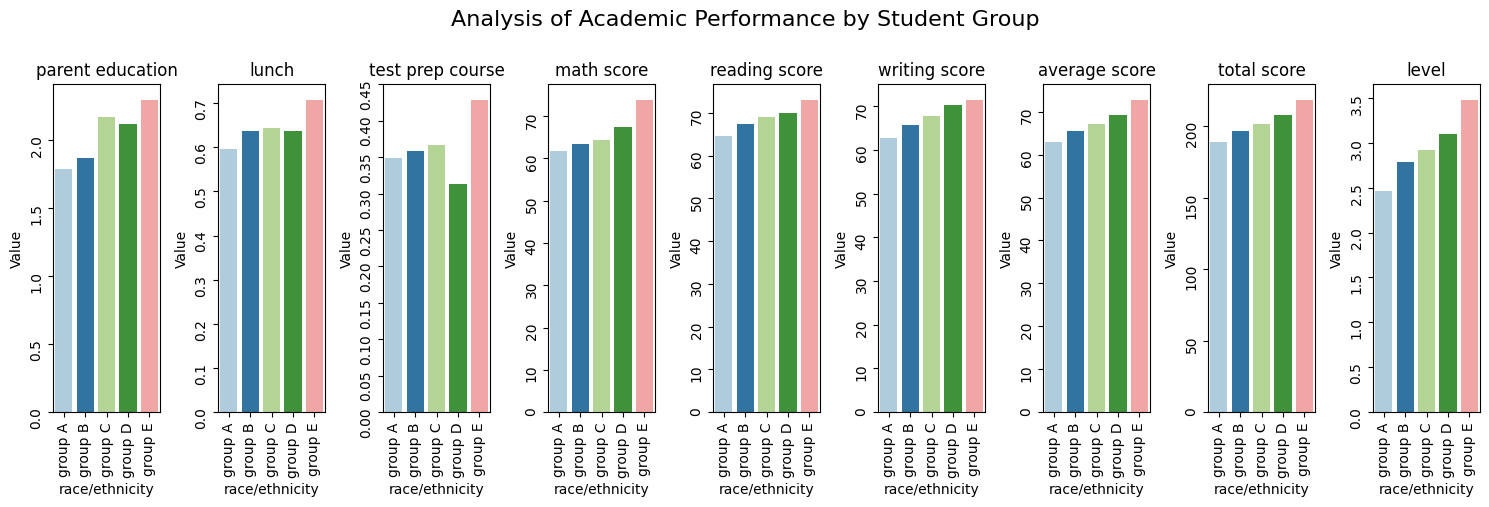

In [49]:
fig, axes = plt.subplots(1, len(race_ethnicity_df.columns), figsize=(15, 5))
color_palette = ['Blues', 'Yellow', 'Reds', 'Oranges', 'Purples']

for i, column_name in enumerate(race_ethnicity_df.columns):
    sns.barplot(x = race_ethnicity_df.index, y = column_name, data = race_ethnicity_df, ax = axes[i], palette = 'Paired')
    axes[i].set_title(column_name)
    axes[i].set_ylabel('Value')
    axes[i].tick_params(rotation = 90)
fig.suptitle("Analysis of Academic Performance by Student Group", fontsize=16, y=1.005)
plt.tight_layout()
plt.show()

#### The Key Findings 
Group E consistently emerges as the top-performing group across all charts, indicating notable academic success. Notably, their high course completion rates reaffirm the significance of this factor in determining students' overall achievement.

While the remaining groups exhibit slight variations in metrics such as parental education and course completion, Group A stands out as the lowest-performing group, particularly in terms of academic level. This underscores the critical role of parental education and lunch provision, as Group A records the lowest values for both variables. Despite its smaller student population, cultural considerations warrant attention when addressing the challenges faced by Group A.

These findings emphasize the multifaceted nature of academic performance, influenced by factors ranging from parental education to cultural dynamics within different student groups.

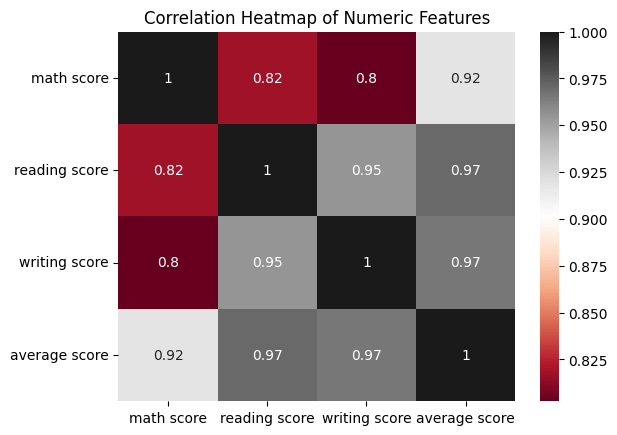

In [61]:
sns.heatmap(numeric_data.corr(),annot = True,cmap = 'RdGy')
plt.title('Correlation Heatmap of Numeric Features', fontsize = 12)


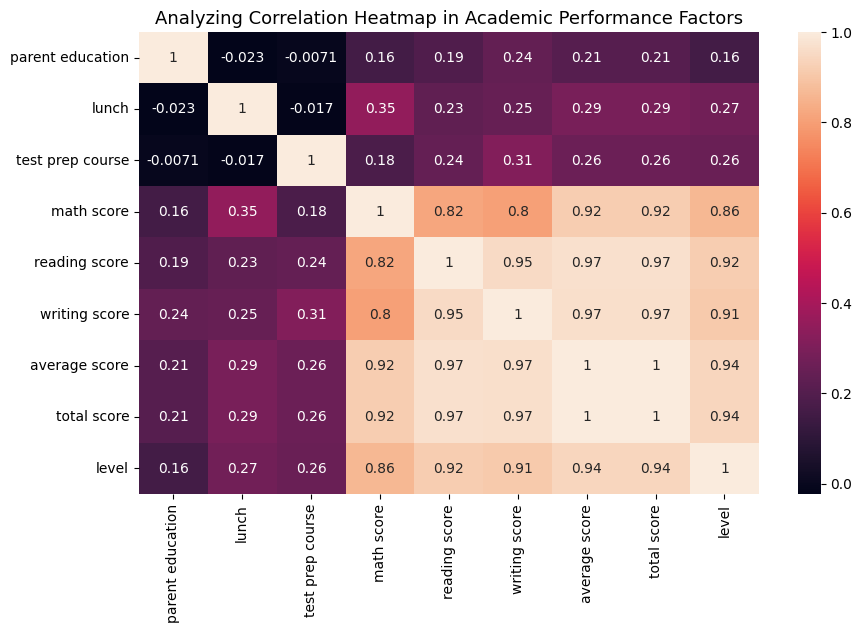

In [51]:

df_numeric = df.select_dtypes(include=['number']) 

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True)
plt.title('Analyzing Correlation Heatmap in Academic Performance Factors', fontsize=13)
plt.show()


### Correlation

* Gender and Race Correlation: There's a correlation between gender, race, and academic performance, with females and students from certain racial groups showing higher scores.

* Impact of Parental Education: Parental education levels correlate positively with student performance, indicating the importance of family background in academic outcomes.

* Influence of Lunch Quality: The quality of lunch provided to students shows correlations with math performance, suggesting that nutrition plays a role in cognitive function and academic success.

* Course Engagement and Writing Scores: Higher engagement in courses correlates positively with writing proficiency, highlighting the importance of active participation in learning activities.



#### Conclusion
Overall Implications: Understanding these correlations can help educators and policymakers implement targeted interventions to improve academic outcomes, such as promoting nutrition education, enhancing course engagement, and addressing disparities in parental education.




